In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as scisig
import scipy.optimize as opt
import analysis_utils as au

In [248]:
filename = 'D:/Lab Data/diamond/240521/Mass/Particle 4/'
data = sio.loadmat(filename + 'NoChargeNoDrive.mat')
tt_ncnd = np.transpose(data['D'])[0]
fs_ncnd = int(1/data['Tinterval'][0][0])

In [249]:
nps_frac = 0.01
PSD_ncnd = scisig.welch(tt_ncnd, fs = fs_ncnd, nperseg = int(nps_frac*fs_ncnd))

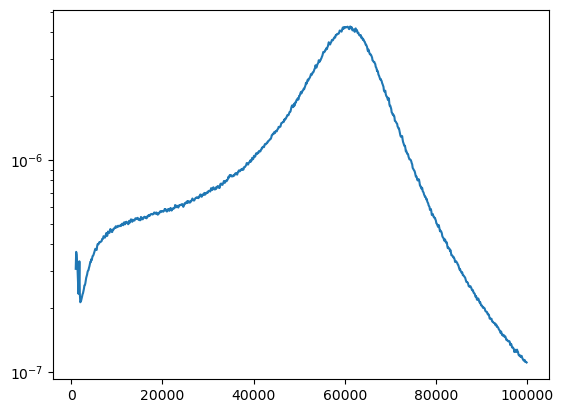

In [252]:
lb = int(nps_frac*1000)
ub = int(nps_frac*100000)
plt.figure()
plt.plot(PSD_ncnd[0][lb:ub], PSD_ncnd[1][lb:ub])
plt.yscale('log')

In [267]:
lb = int(nps_frac*10000)
ub = int(nps_frac*200000)
fit_ncnd, cov_ncnd = opt.curve_fit(au.Linewidth2, PSD_ncnd[0][lb:ub], PSD_ncnd[1][lb:ub], p0 = [10**7, 70000, 10000, 2*10**(-8)])
print(fit_ncnd)
fitted_ncnd = au.Linewidth2(PSD_ncnd[0], *fit_ncnd)

[2.78549842e+08 6.17531317e+04 1.80511698e+04 3.84632742e-08]


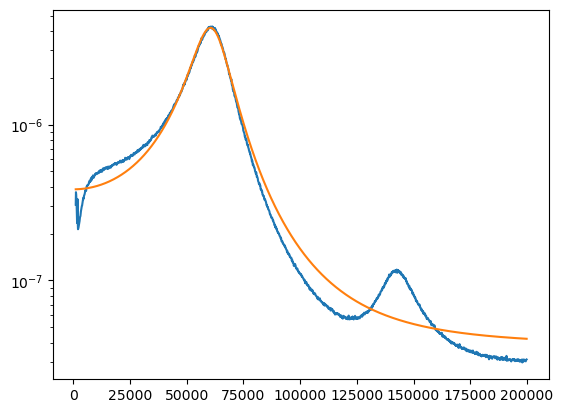

In [268]:
lb = int(nps_frac*1000)
ub = int(nps_frac*200000)
plt.figure()
plt.plot(PSD_ncnd[0][lb:ub], PSD_ncnd[1][lb:ub])
plt.plot(PSD_ncnd[0][lb:ub], fitted_ncnd[lb:ub])
plt.yscale('log')

In [375]:
lb = int(nps_frac*15000)
ub = int(nps_frac*100000)
area_1 = np.trapz(PSD_ncnd[1][lb:ub], PSD_ncnd[0][lb:ub]) - (lb-ub)/nps_frac*fit_ncnd[3]
lb = int(nps_frac*0)
ub = int(nps_frac*200000)
area_2 = np.trapz(fitted_ncnd[lb:ub], PSD_ncnd[0][lb:ub]) - (lb-ub)/nps_frac*fit_ncnd[3]
print(area_1)
print(area_2)
# Use area_2 for uncalibrated variance of oscillator

0.11300238881289344
0.12988359778025654


In [270]:
# Let's make a graph of charge changes to put in presentation

In [307]:
filename = 'D:/Lab Data/diamond/240521/Charging/Particle 4/After'
files = ['']
end = '.mat'

In [308]:
X = np.zeros(0)
theta = np.zeros(0)
HV = np.zeros(0)
for file in files:
    data = sio.loadmat(filename+str(file)+end)
    X = np.concatenate((X, np.transpose(data['E'])[0]))
    theta = np.concatenate((theta, np.transpose(data['F'])[0]))
    HV = np.concatenate((HV, np.transpose(data['G'])[0]))
time = np.linspace(0, len(X)*0.001, len(X))

Text(0, 0.5, 'Charge (e)')

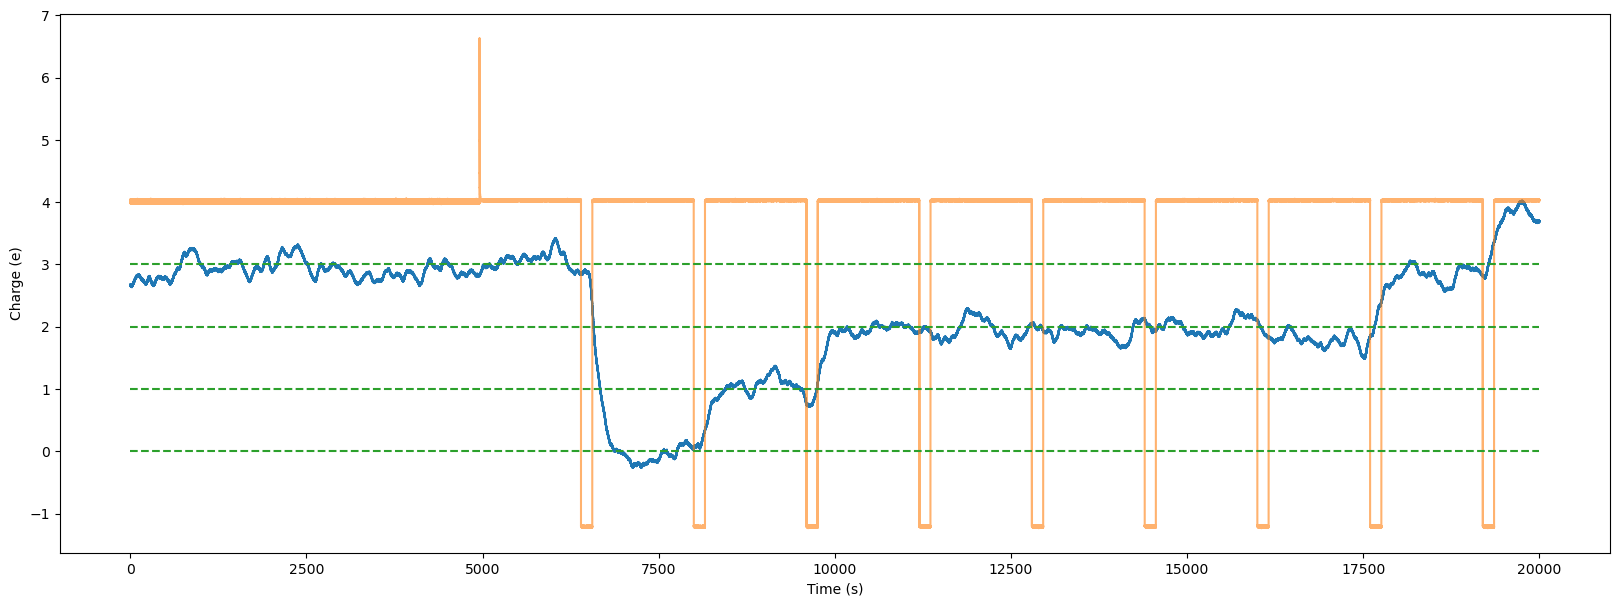

In [309]:
plt.figure(figsize = (20, 7))
plt.plot(time, X/0.2)
plt.plot(time, (HV/1+0.8)/0.2, alpha = 0.6)
plt.plot([time[0], time[-1]], [3, 3], 'tab:green', linestyle = '--')
plt.plot([time[0], time[-1]], [0.0, 0.0], 'tab:green', linestyle = '--')
plt.plot([time[0], time[-1]], [1, 1], 'tab:green', linestyle = '--')
plt.plot([time[0], time[-1]], [2, 2], 'tab:green', linestyle = '--')
plt.xlabel('Time (s)')
plt.ylabel('Charge (e)')

In [281]:
# So two charges on particle before frequency comb

In [282]:
filename = 'D:/Lab Data/diamond/240521/Mass/Particle 4/'
data = sio.loadmat(filename + 'FreqComb.mat')
tt_fc = np.transpose(data['D'])[0]
drive_fc = np.transpose(data['G'])[0]
fs_fc = int(1/data['Tinterval'][0][0])

In [283]:
nps_frac = 0.01
PSD_fc= scisig.welch(tt_fc, fs = fs_fc, nperseg = int(nps_frac*fs_fc))
PSD_drive_fc= scisig.welch(drive_fc, fs = fs_fc, nperseg = int(nps_frac*fs_fc))

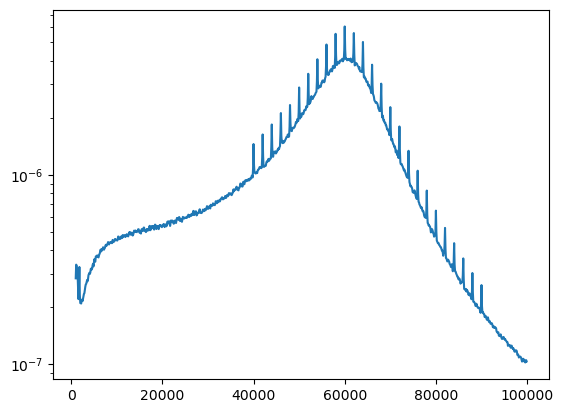

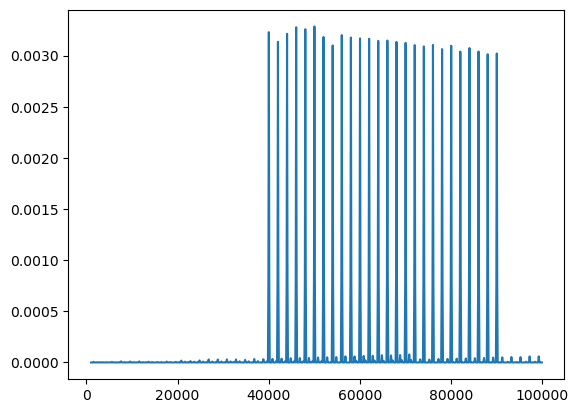

In [284]:
lb = int(nps_frac*1000)
ub = int(nps_frac*100000)
plt.figure()
plt.plot(PSD_fc[0][lb:ub], PSD_fc[1][lb:ub])
plt.yscale('log')
lb = int(nps_frac*1000)
ub = int(nps_frac*100000)
plt.figure()
plt.plot(PSD_drive_fc[0][lb:ub], PSD_drive_fc[1][lb:ub])

In [285]:
areas_resp = []
areas_fc = []
areas_tf = []

freqs = np.linspace(40000*nps_frac, 90000*nps_frac, 26)

for freq in freqs:
    freq = int(freq)
    area_tmp = np.trapz(PSD_fc[1][freq-2:freq+3], PSD_fc[0][freq-2:freq+3])
    areas_resp.append(area_tmp)
    area_tmp = np.trapz(PSD_drive_fc[1][freq-2:freq+3], PSD_drive_fc[0][freq-2:freq+3])
    areas_fc.append(area_tmp)
    #area_tmp = np.trapz(PSD_ncnd[1][freq-2:freq+3], PSD_ncnd[0][freq-2:freq+3])
    area_tmp = (PSD_fc[1][freq-2] + PSD_ncnd[1][freq+2])/2*400
    areas_tf.append((area_tmp))
areas_resp = np.array(areas_resp)
areas_fc = np.array(areas_fc)
areas_tf = np.array(areas_tf)

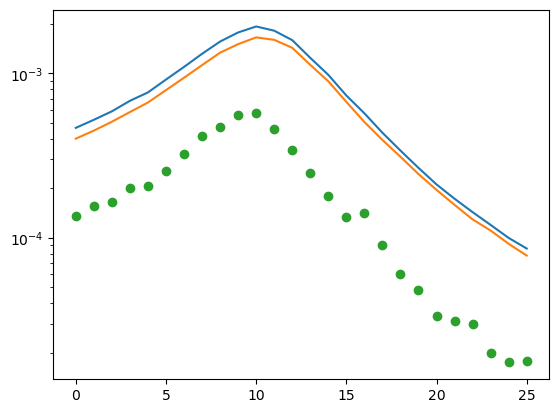

In [286]:
plt.plot(areas_resp)
plt.plot(areas_tf)
plt.plot((areas_resp-areas_tf)/areas_fc, 'o')
plt.yscale('log')


In [353]:
fit_cp, cov_cp = opt.curve_fit(au.Linewidth, freqs/nps_frac, (areas_resp-areas_tf)/areas_fc*0.5, p0 = [10**10, 70000, 10000]) # doing /areas_fc*0.5 normalizes everything to as if it was dirven by a 1V wave at each frequency so can assume 1V in the last step
fitted_cp = au.Linewidth(PSD_fc[0], *fit_cp)

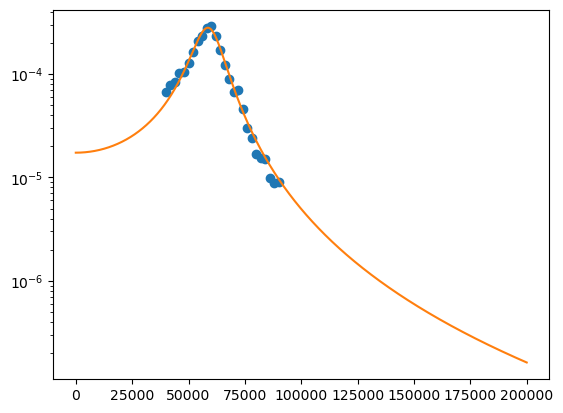

In [354]:

plt.plot(freqs/nps_frac, (areas_resp-areas_tf)/areas_fc*0.5, 'o')
plt.plot(PSD_fc[0], fitted_cp)
plt.yscale('log')

In [390]:
fit_cp

array([1.45569780e+10, 5.95096330e+04, 1.49295707e+04])

In [391]:
fit_ncnd

array([2.78549842e+08, 6.17531317e+04, 1.80511698e+04, 3.84632742e-08])

In [355]:
F0 = 122*3*1.6*10**(-19)
w0 = fit_ncnd[1]*2*np.pi
T = 293
kb = 1.38*10**(-23)

In [386]:
mass = F0**2*w0**2*area_1/(2*np.pi)**6/2/fit_cp[0]/T/kb

In [387]:
(mass*3/4/np.pi/2200)**(1/3)

8.850724361340323e-08

In [388]:
mass1 = 4/3*np.pi*2200*(83*10**(-9))**3

In [389]:
mass/mass1

1.2125570191424049

In [379]:
np.sqrt(4/3*np.pi*2200*(83*10**(-9))**3*w0**2*area_1/kb/T)/10**6

1.6729997115911586

In [370]:
fit_ncnd[2]

18051.1697853283

In [373]:
w0 = 55000*2*np.pi # Natural frequency of oscillator
P = 11 # Pressure in mbar
T = 293 # Environmental temperature
R = 2*(0.083)*10**(-6) # Particle Radius
p = 2200 # Particle Denisty
dtn = 1*10**(-8) # Timestep
M = 4/3*np.pi*R**3*p # Particle mass
kb = 1.38*10**(-23) # Boltzmann constant
m = 29*1.67*10**(-27) # average mass of air particles
v = np.sqrt(8*1.38*10**(-23)*T/(np.pi*m)) # velocity of air particles
N0 = 2.43*10**(25) # Number density of air and ambient pressure
P0 = 1000 # Ambient pressure
N=N0*P/P0 # Number density of air at pressure P

y = (4/3*np.pi)*(m*v*N*R**2)/(M) # Damping from air

In [374]:
y

16344.394452989913